## Using ``otherCdmGroups`` parameter
This notebook shows how to set the "otherCdmGroups" parameter to let the PDSCH know that some CDM groups are used by other devices and therefore data should not be assigned in those CDM groups. (CDM Groups without data)

In [1]:
import numpy as np
import scipy.io

from neoradium import Carrier, PDSCH, Grid


In [2]:
carrier = Carrier(numRbs=5, spacing=30)  # 5*12*30000 = 1,800,000 Hz
carrier.print()


Carrier Properties:
  Cell Id:               1
  Bandwidth Parts:       1
  Active Bandwidth Part: 0
  Bandwidth Part 0:
    Resource Blocks:    5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type:            normal
    bandwidth:          1.8 MHz
    symbolsPerSlot:     14
    slotsPerSubFrame:   2
    nFFT:               1024
    frameNo:            0
    slotNo:             0



In [3]:
# Create a 2-layer PDSCH with Mapping Type A (default) using All Symbols and PRBs in the BWP (default)
pdsch = PDSCH(carrier.curBwp, numLayers=2)
# This PDSCH is using CDM group 0 only. (2 layers -> 2 ports -> one CDM group)
# Now inform DMRS that for example we want to use CDM group 1 for a different device
pdsch.setDMRS(otherCdmGroups=[1])
pdsch.print()


PDSCH Properties:
  mappingType: A
  nID: 1
  rnti: 1
  numLayers: 2
  numCodewords: 1
  modulation: 16QAM
  portSet: [0, 1]
  symSet:   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  prbSet:   0   1   2   3   4
  interleavingBundleSize: 0
  PRG Size: Wideband
  Bandwidth Part:
    Resource Blocks:    5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type:            normal
    bandwidth:          1.8 MHz
    symbolsPerSlot:     14
    slotsPerSubFrame:   2
    nFFT:               1024
    frameNo:            0
    slotNo:             0
  DMRS:
    configType: 1
    nIDs: []
    scID: 0
    sameSeq: 1
    symbols: Single
    typeA1stPos: 2
    additionalPos: 0
    cdmGroups: [0, 0]
    deltaShifts: [0, 0]
    allCdmGroups: [0, 1]
    symSet: [2]
    REs (before shift): [0, 2, 4, 6, 8, 10]
    epreRatioDb: -3 (db)



In [4]:
# Get a resourse grid from the PDSCH object. This creates a Grid object and populates it with the DMRS values
grid = pdsch.getGrid()
# Print some statistics about the grid
grid.getStats()
# Note that there are some resources assigned as "NO_DATA"

{'GridSize': 1680, 'UNASSIGNED': 1560, 'NO_DATA': 60, 'DMRS': 60}

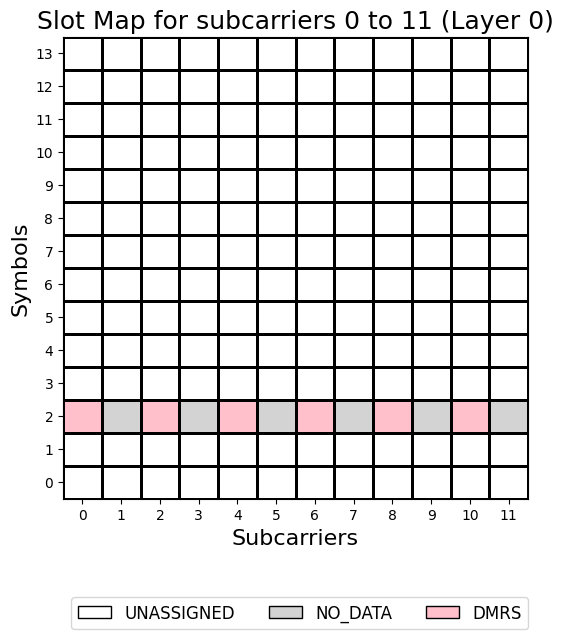

In [5]:
# Draw grid map for all layers, one slot and one PRB (reRange=(0,12))
grid.drawMap([0], reRange=(0,12))
# Note that the REs in the DMRS symbols that are not used by DMRS, cannot be used for data. 
# If we use these REs for data, it would interfere with the DMRS for the other device.

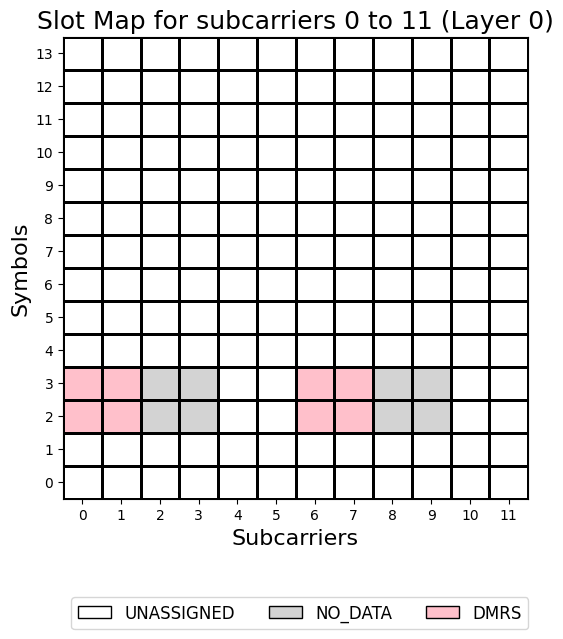

In [6]:
# Lets see another example. Here we are telling DMRS object that CDM groups 1 is used by 
# other devices. In config type 2, we can have 3 CDM groups. So, as you can see the first CDM group 
# (CDM Group 0) is used by this PDSCH. The second one (CDM Group 1) is used by other UEs (e.g. PDSCH of a
# different UE). The third one (CDM Group 2) is not used by this PDSCH or other devices. Therefore, the
# resources are available to the data.
pdsch.setDMRS(configType=2, otherCdmGroups=[1], symbols=2)
grid = pdsch.getGrid()
grid.drawMap([0], reRange=(0,12))


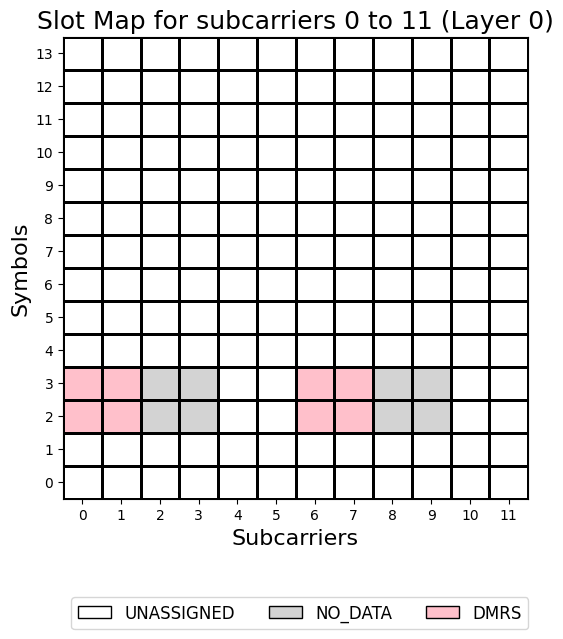

In [7]:
# Now let's look at another example. Here we have a PDSCH with 4 layers. This means CDM Groups 0 and 1 are used
# by this PDSCH.
pdsch = PDSCH(carrier.curBwp, numLayers=4)
pdsch.setDMRS(configType=2, symbols=2)
# We draw the map for layers 0 and 2 which are in CDM groups 0 and 1 correspondingly. As you can see
# the CDM Groups 1 and 0 are marked as "NO_DATA" for ports 0 and 2. This is to prevent the DMRS
# signals to interfer with eachother. The REs of CDM Group 2 is available for all layers to be used by
# data
grid = pdsch.getGrid()
grid.drawMap([0], reRange=(0,12))


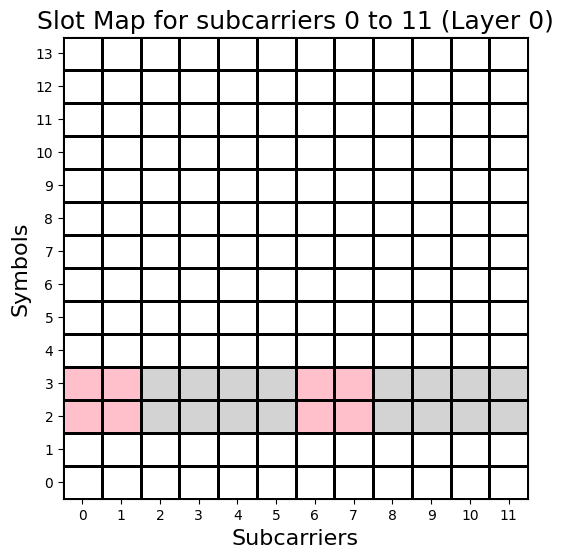

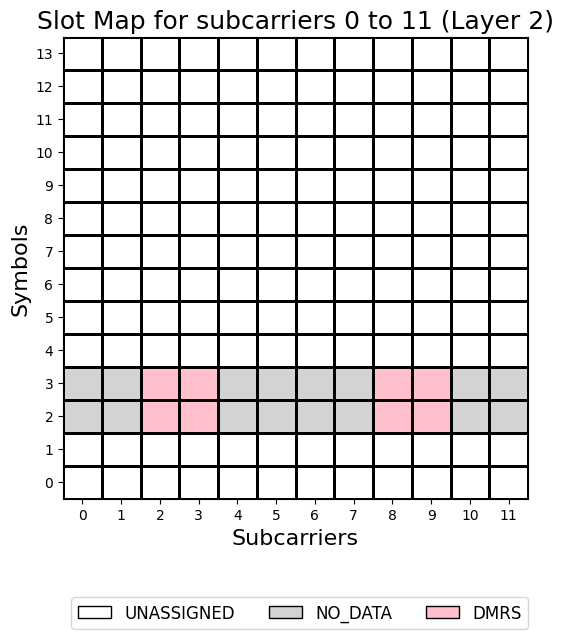

In [8]:
# In the same configuration as above, suppose there is another PDSCH for another UE using the 
# CDM group 2. Now we need to make sure the REs in this CDM group are not used by this PDSCH.
pdsch.setDMRS(configType=2, symbols=2, otherCdmGroups=[2])
pdsch.getGrid().drawMap([0,2], reRange=(0,12))
